In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import pickle
from keras.models import load_model

In [2]:
df = pd.read_csv('avg_by_game')

In [3]:
stats = pd.read_excel('C:\\Users\\Daniel\\Documents\\Flatiron\\Capstone\\sports_predictions\\stats.xlsx')

In [4]:
df.head()

,GameID,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,...,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas),Season
0,2011-12-25 00:00:00 Boston @ New York,106.0,104.0,0.534,0.459,22.2,63.9,48.6,9.7,15.5,...,7.5,9.3,16.7,111.6,113.7,1,0.0,2,4.5,2011
1,2011-12-25 00:00:00 Chicago @ Lakers,87.0,88.0,0.500,0.263,32.4,65.2,61.1,6.8,10.8,...,15.9,6.7,12.8,100.0,98.9,1,1.0,-1,-5.0,2011
2,2011-12-25 00:00:00 Clippers @ Golden State,86.0,105.0,0.421,0.293,36.2,70.5,53.1,4.4,13.8,...,10.0,13.1,9.3,116.3,95.3,1,1.0,-19,-4.5,2011
3,2011-12-25 00:00:00 Miami @ Dallas,94.0,105.0,0.433,0.366,18.2,60.5,74.2,10.1,0.0,...,9.1,11.1,19.0,105.7,94.7,1,1.0,-11,-4.5,2011
4,2011-12-25 00:00:00 Orlando @ Oklahoma City,97.0,89.0,0.542,0.361,18.4,72.0,61.8,8.6,9.4,...,7.6,7.5,16.3,96.2,104.8,1,0.0,8,7.5,2011


In [5]:
data = df.set_index(df['GameID'], drop=True)
data.drop(columns='GameID', inplace=True)

In [6]:
y = data['Home Win By']
x = data.drop(columns='Home Win By')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
nn_model = models.Sequential()

In [8]:
nn_model.add(Dense(500, input_dim=30, activation= 'relu'))
nn_model.add(Dense(250, activation= 'relu'))
nn_model.add(Dense(125, activation= 'relu'))

nn_model.add(Dense(1, activation='linear'))

In [9]:
nn_model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])

In [10]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_mean_squared_error', mode='min', verbose=1, save_best_only=True)

In [11]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               15500     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 126       
Total params: 172,251
Trainable params: 172,251
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = nn_model.fit(x_train, y_train, epochs=200, verbose=2, batch_size=300, validation_data=(x_test, y_test), callbacks=[es, mc])

Epoch 1/200
27/27 - 2s - loss: 2520.3069 - mean_squared_error: 2520.3069 - val_loss: 225.0085 - val_mean_squared_error: 225.0085

Epoch 00001: val_mean_squared_error improved from inf to 225.00847, saving model to best_model.h5
Epoch 2/200
27/27 - 0s - loss: 211.6201 - mean_squared_error: 211.6201 - val_loss: 188.3333 - val_mean_squared_error: 188.3333

Epoch 00002: val_mean_squared_error improved from 225.00847 to 188.33333, saving model to best_model.h5
Epoch 3/200
27/27 - 0s - loss: 183.3744 - mean_squared_error: 183.3744 - val_loss: 183.7092 - val_mean_squared_error: 183.7092

Epoch 00003: val_mean_squared_error improved from 188.33333 to 183.70918, saving model to best_model.h5
Epoch 4/200
27/27 - 0s - loss: 179.8478 - mean_squared_error: 179.8478 - val_loss: 184.0801 - val_mean_squared_error: 184.0802

Epoch 00004: val_mean_squared_error did not improve from 183.70918
Epoch 5/200
27/27 - 0s - loss: 173.2638 - mean_squared_error: 173.2638 - val_loss: 175.4771 - val_mean_squared_er


Epoch 00039: val_mean_squared_error did not improve from 140.98213
Epoch 40/200
27/27 - 0s - loss: 162.2165 - mean_squared_error: 162.2165 - val_loss: 189.3370 - val_mean_squared_error: 189.3370

Epoch 00040: val_mean_squared_error did not improve from 140.98213
Epoch 41/200
27/27 - 0s - loss: 147.4592 - mean_squared_error: 147.4592 - val_loss: 152.2884 - val_mean_squared_error: 152.2884

Epoch 00041: val_mean_squared_error did not improve from 140.98213
Epoch 42/200
27/27 - 0s - loss: 140.4376 - mean_squared_error: 140.4376 - val_loss: 153.1390 - val_mean_squared_error: 153.1390

Epoch 00042: val_mean_squared_error did not improve from 140.98213
Epoch 43/200
27/27 - 0s - loss: 160.0318 - mean_squared_error: 160.0318 - val_loss: 214.9717 - val_mean_squared_error: 214.9717

Epoch 00043: val_mean_squared_error did not improve from 140.98213
Epoch 44/200
27/27 - 0s - loss: 158.1142 - mean_squared_error: 158.1142 - val_loss: 178.7561 - val_mean_squared_error: 178.7561

Epoch 00044: val_me


Epoch 00079: val_mean_squared_error did not improve from 134.63304
Epoch 80/200
27/27 - 0s - loss: 133.3196 - mean_squared_error: 133.3196 - val_loss: 151.0918 - val_mean_squared_error: 151.0918

Epoch 00080: val_mean_squared_error did not improve from 134.63304
Epoch 81/200
27/27 - 0s - loss: 137.6285 - mean_squared_error: 137.6285 - val_loss: 133.2574 - val_mean_squared_error: 133.2574

Epoch 00081: val_mean_squared_error improved from 134.63304 to 133.25735, saving model to best_model.h5
Epoch 82/200
27/27 - 0s - loss: 131.6399 - mean_squared_error: 131.6399 - val_loss: 133.6365 - val_mean_squared_error: 133.6365

Epoch 00082: val_mean_squared_error did not improve from 133.25735
Epoch 83/200
27/27 - 0s - loss: 134.9349 - mean_squared_error: 134.9349 - val_loss: 133.1925 - val_mean_squared_error: 133.1925

Epoch 00083: val_mean_squared_error improved from 133.25735 to 133.19246, saving model to best_model.h5
Epoch 84/200
27/27 - 0s - loss: 130.9996 - mean_squared_error: 130.9996 - 


Epoch 00120: val_mean_squared_error did not improve from 131.14412
Epoch 121/200
27/27 - 0s - loss: 130.9812 - mean_squared_error: 130.9812 - val_loss: 133.6314 - val_mean_squared_error: 133.6314

Epoch 00121: val_mean_squared_error did not improve from 131.14412
Epoch 122/200
27/27 - 0s - loss: 129.8168 - mean_squared_error: 129.8168 - val_loss: 132.2285 - val_mean_squared_error: 132.2285

Epoch 00122: val_mean_squared_error did not improve from 131.14412
Epoch 123/200
27/27 - 0s - loss: 132.1666 - mean_squared_error: 132.1666 - val_loss: 132.8432 - val_mean_squared_error: 132.8432

Epoch 00123: val_mean_squared_error did not improve from 131.14412
Epoch 124/200
27/27 - 0s - loss: 137.0068 - mean_squared_error: 137.0068 - val_loss: 155.8426 - val_mean_squared_error: 155.8426

Epoch 00124: val_mean_squared_error did not improve from 131.14412
Epoch 125/200
27/27 - 0s - loss: 132.8731 - mean_squared_error: 132.8731 - val_loss: 132.3960 - val_mean_squared_error: 132.3960

Epoch 00125: v

In [13]:
saved_model = load_model('best_model.h5')

<ipython-input-14-e4f85823ae43>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


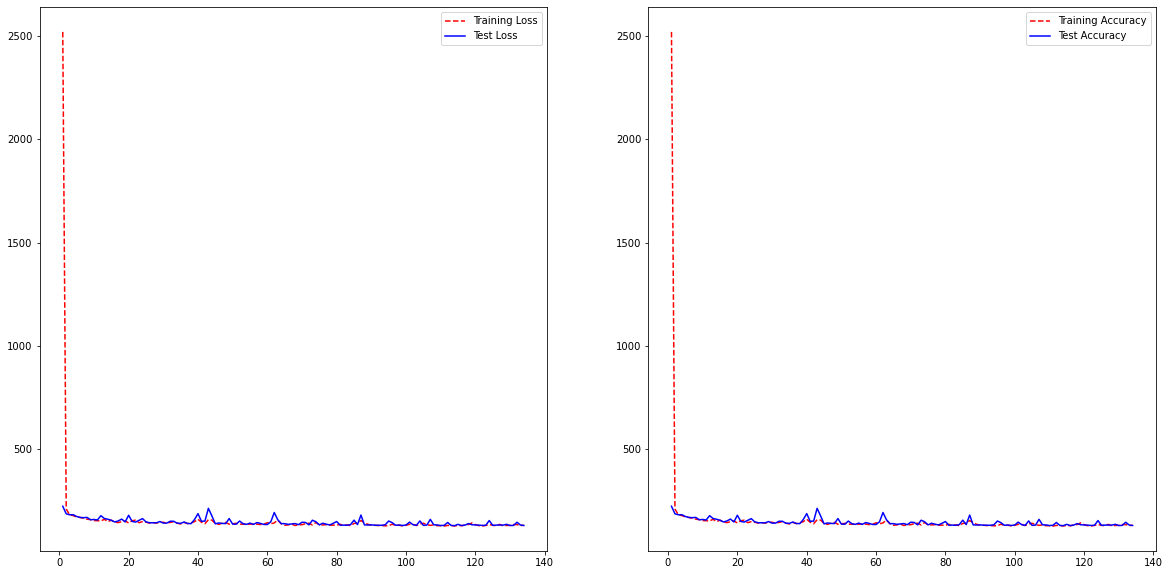

In [14]:
# Get training and test loss/accuracy histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['mean_squared_error']
test_acc = history.history['val_mean_squared_error']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])

# Visualize accuracy  history
ax2.plot(epoch_count, training_acc, 'r--')
ax2.plot(epoch_count, test_acc, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])

fig.show();

In [15]:
train_preds = saved_model.predict(x_train)
test_preds = saved_model.predict(x_test)

In [16]:
print('Training RMSE for neural networks baseline model: {}'.format(mean_squared_error(y_train, train_preds)**0.5))
print('Testing RMSE for neural networks baseline model: {}'.format(mean_squared_error(y_test, test_preds)**0.5))

Training RMSE for neural networks baseline model: 11.283538390083644
Testing RMSE for neural networks baseline model: 11.451816860428993


In [17]:
def beat_vegas(result, vegas, prediction):
    tie = 0
    games = 0
    wins = 0
    win_total = 0
    loss = 0
    loss_total = 0
    
    for i in range(len(result)):
        if ((result[i]>vegas[i]) & (prediction[i]>vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif ((result[i]<vegas[i]) & (prediction[i]<vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif (result[i]==vegas[i]):
            tie += 1
            
        else:
            loss += 1
            games += 1
            loss_total += abs(vegas[i]-prediction[i])
            
    win_rate = (wins/games)*100
    win_distance = win_total/wins
    loss_distance = loss_total/loss
    
    print('Beat Vegas {}% of the time'.format(win_rate))
    print('Vegas RMSE: {}'.format(mean_squared_error(result, vegas)**0.5))
    print('Our RMSE: {}'.format(mean_squared_error(result, prediction)**0.5))
    print('When we beat Vegas, our prediction is {} points away from the Vegas spread.'.format(win_distance))
    print('When we lose to Vegas, our prediction is {} points away from the Vegas spread.'.format(loss_distance))

In [18]:
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], test_preds)

Beat Vegas 63.227513227513235% of the time
Vegas RMSE: 12.41746477088067
Our RMSE: 11.451816860428993
When we beat Vegas, our prediction is [3.056939] points away from the Vegas spread.
When we lose to Vegas, our prediction is [1.9003769] points away from the Vegas spread.


In [19]:
# nn_file = 'nn_model.sav'
# pickle.dump(saved_model, open(nn_file, 'wb'))

In [20]:
real_predictions = saved_model.predict(stats)

In [21]:
real_preds = pd.DataFrame(real_predictions, index=stats.index)

In [22]:
real_preds

,0
0,3.705619
1,-12.667225
2,-1.185692
3,5.438563
4,7.127576
5,-5.888054
6,2.099043
7,-1.199551
8,8.183105


In [23]:
preds =  pd.DataFrame(test_preds, index=x_test.index)

In [24]:
preds.columns=['NN Predictions']

In [25]:
train_preds =  pd.DataFrame(train_preds, index=x_train.index)
train_preds.columns=['NN Training Prediction']

In [26]:
# preds.to_csv('NN Preds')
#train_preds.to_csv('NN Train Prediction')